In [2]:
import pandas as pd
import numpy as np

# Q1   1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [3]:
import pandas as pd

file_path = r"C:\Users\acer\Desktop\excelr\assignments\11 Text mining\Elon_musk.csv"

# Try reading with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try another encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the DataFrame
df.head()


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
Elon_musk_df = df[['Unnamed: 0','Text']]
print(Elon_musk_df.shape)
Elon_musk_df.head()

(1999, 2)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
Elon_musk_df = Elon_musk_df[Elon_musk_df['Text'] != 'neutral']
print(Elon_musk_df.shape)
Elon_musk_df.head()

(1999, 2)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
sentiment_label = Elon_musk_df.Text.factorize()
sentiment_label

(array([   0,    1,    2, ..., 1994, 1995, 1996], dtype=int64),
 Index(['@kunalb11 Im an alien',
        '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
        '@joerogan @Spotify Great interview!',
        '@gtera27 Doge is underestimated',
        '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
        'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
        'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
        '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
        '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
        'The most entertaining outcome is the most likely',
        ...
        '@buzzindelhi Sorry, should hopefully be soon!',
        '@kenyanwalstreet Not actually a payout, just a vesting of stock options. It may never pay out, as the stock cant b
  https://t.co/8Zg

In [7]:
len(Elon_musk_df['Text'])

1999

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [9]:
Elon_musk = Elon_musk_df.Text.values
print(Elon_musk)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Elon_musk )

vocab_size = len(tokenizer.word_index) + 1

encoded_docs = tokenizer.texts_to_sequences(Elon_musk )

padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence)

['@kunalb11 I\x92m an alien'
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'
 '@joerogan @Spotify Great interview!' ...
 '@TeslaGong @PPathole Samwise Gamgee'
 '@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>'
 'Progress update August 28']
[[   0    0    0 ...  202   62 1318]
 [   0    0    0 ...   31  535   19]
 [   0    0    0 ... 2101   36  955]
 ...
 [   0    0    0 ...    0  671   25]
 [   0    0    0 ...  200    8  200]
 [   0    0    0 ...  600 1298 1285]]


In [10]:
print(tokenizer.word_index)

{'t': 1, 'https': 2, 'co': 3, 'the': 4, 'to': 5, 'is': 6, 'a': 7, 'u': 8, 'of': 9, 'spacex': 10, 'amp': 11, 'in': 12, 'for': 13, 'tesla': 14, 'will': 15, 'be': 16, 'erdayastronaut': 17, 'this': 18, 'it': 19, 'we': 20, 'on': 21, 'that': 22, 'rt': 23, 'but': 24, 'ppathole': 25, 'i': 26, 'flcnhvy': 27, 'with': 28, 'are': 29, 'at': 30, 'you': 31, 'yes': 32, 'and': 33, 'not': 34, '0001f923': 35, 'great': 36, 'have': 37, 'was': 38, 'teslaownerssv': 39, '\x85': 40, 'from': 41, 'as': 42, 'wholemarsblog': 43, 'just': 44, 'so': 45, 'no': 46, 'teslarati': 47, 'has': 48, 'more': 49, 'haha': 50, 'nasaspaceflight': 51, 'all': 52, 'it\x92s': 53, 'space': 54, 'good': 55, 'should': 56, 'launch': 57, 'than': 58, 'sure': 59, 'my': 60, 'or': 61, 'an': 62, 'can': 63, 'out': 64, 'yeah': 65, 'if': 66, 'much': 67, 'cleantechnica': 68, 'would': 69, 'some': 70, 'first': 71, 'about': 72, 'do': 73, 'one': 74, 'like': 75, 'there': 76, 'too': 77, 'by': 78, 'true': 79, 'kristennetten': 80, 'probably': 81, 'they': 82

In [11]:
print(Elon_musk [1])
print(encoded_docs[1])

@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
[96, 97, 98, 2097, 2098, 21, 637, 28, 2099, 6, 106, 379, 37, 31, 535, 19]


In [12]:
print(padded_sequence[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   96   97   98 2097 2098   21  637   28 2099    6  106  379
   37 

In [13]:
embedding_vector_length = 32
model = Sequential() 

model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )

model.add(SpatialDropout1D(0.25))

model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           184224    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 200875 (784.67 KB)
Trainable params: 200875 (784.67 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [14]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5


50/50 [==============================] - 51s 709ms/step - loss: -2791.0588 - accuracy: 6.2539e-04 - val_loss: -14798.6533 - val_accuracy: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 27s 531ms/step - loss: -8523.9297 - accuracy: 6.2539e-04 - val_loss: -23142.1309 - val_accuracy: 0.0000e+00
Epoch 3/5
50/50 [==============================] - 23s 467ms/step - loss: -11549.1445 - accuracy: 6.2539e-04 - val_loss: -29200.7734 - val_accuracy: 0.0000e+00
Epoch 4/5
50/50 [==============================] - 23s 453ms/step - loss: -14092.2480 - accuracy: 6.2539e-04 - val_loss: -34519.8594 - val_accuracy: 0.0000e+00
Epoch 5/5
50/50 [==============================] - 25s 493ms/step - loss: -16365.1260 - accuracy: 6.2539e-04 - val_loss: -39718.1484 - val_accuracy: 0.0000e+00


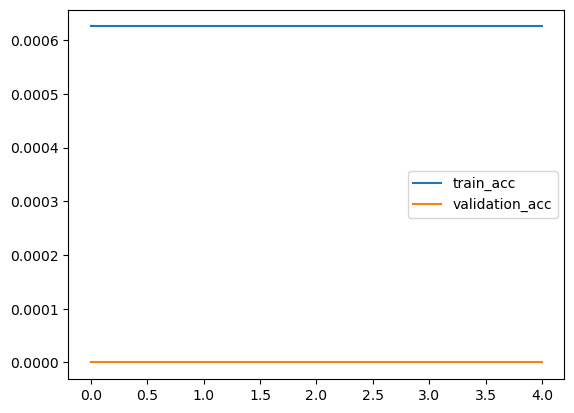

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='validation_acc')
plt.legend()
plt.savefig("Accuracy plot.png")

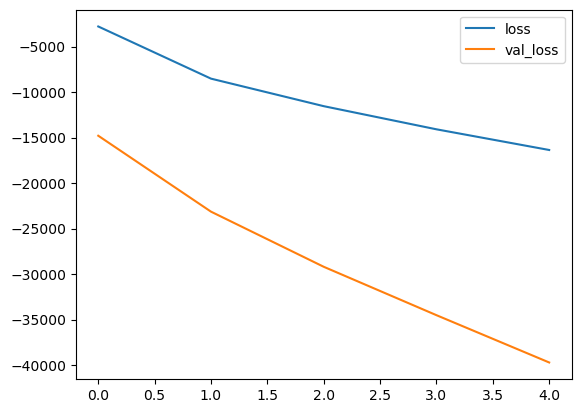

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig("Loss plot.png")

In [17]:
def predict_sentiment(Text):
    tw = tokenizer.texts_to_sequences([Text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [18]:
test_sentence_1= 'i have littel worried about interview'
predict_sentiment(test_sentence_1)

1/1 [==============================] - 1s 750ms/step
Predicted label:  @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?


In [19]:
!pip install textblob

In [21]:
import pandas as pd
from textblob import TextBlob

text_column = 'Text'

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to row in DataFrame
df['Sentiment'] = df[text_column].apply(get_sentiment)
print(df[['Text', 'Sentiment']])

                                                   Text  Sentiment
0                                @kunalb11 Im an alien  -0.250000
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   0.000000
2                   @joerogan @Spotify Great interview!   1.000000
3                       @gtera27 Doge is underestimated   0.000000
4     @teslacn Congratulations Tesla China for amazi...   0.345313
...                                                 ...        ...
1994  @flcnhvy True, it sounds so surreal, but the n...   0.111111
1995  @PPathole Make sure to read ur terms &amp; con...   0.625000
1996                @TeslaGong @PPathole Samwise Gamgee   0.000000
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  -0.375000
1998                          Progress update August 28   0.000000

[1999 rows x 2 columns]


text = 'Progress update August 28'

analysis = TextBlob(text)

#sentiment polarity(-1 is negative, 0 is neutral,1 is positive)
sentiment_polarity = analysis.sentiment.polarity
print(f"Sentiment Polarity: {sentiment_polarity}")

for i in range(-1,1):
    if sentiment_polarity > 0:
        print("Positive sentiment")
    elif sentiment_polarity < 0:
        print("Negative sentiment")
    else:
        print("Neutral sentiment")

# Q2

In [22]:
!pip install autoscraper

In [23]:
from autoscraper import AutoScraper

In [24]:
amazon_url = 'https://www.flipkart.com/roadster-full-sleeve-color-block-men-sweatshirt'

wanted_list = ['₹722','Men Full Sleeve Color Block Sweatshirt','128 ratings and 7 reviews']

In [25]:
scraper=AutoScraper()
result=scraper.build(amazon_url,wanted_list)
print(result)

[]


In [26]:
from textblob import TextBlob

reviews = ['perfect size and perfect fitting for me.Absolutely amazing sweat shirt.']

sentiments = [TextBlob(review).sentiment.polarity for review in reviews]

classified_sentiments = ['positive' if s > 0 else 'negative' if s < 0 else 'neutral' for s in sentiments]

# Print results
for review, sentiment in zip(reviews, classified_sentiments):
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")
    print("\n")

Review: perfect size and perfect fitting for me.Absolutely amazing sweat shirt.
Sentiment: positive




In [27]:
review = "perfect size and perfect fitting for me. Absolutely amazing sweatshirt."

analysis = TextBlob(review)
sentiment = analysis.sentiment.polarity

print("Sentiment:", sentiment)
if sentiment > 0:
    print("Emotion: Positive")
elif sentiment < 0:
    print("Emotion: Negative")
else:
    print("Emotion: Neutral")


Sentiment: 0.775
Emotion: Positive


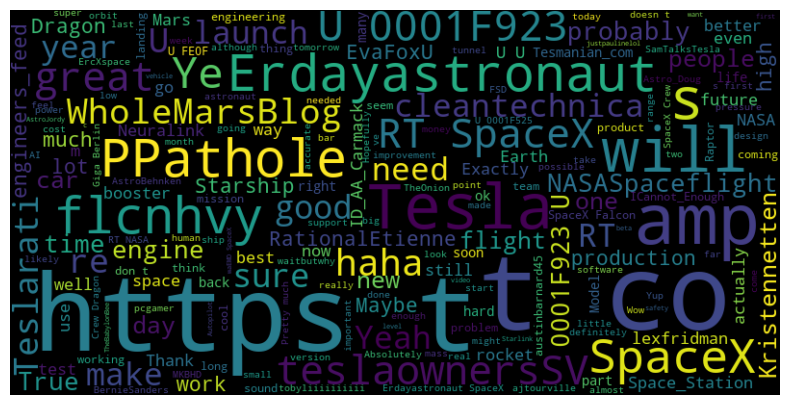

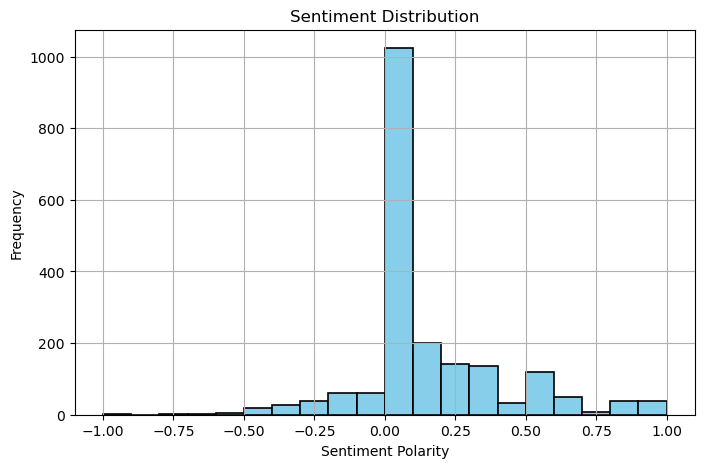

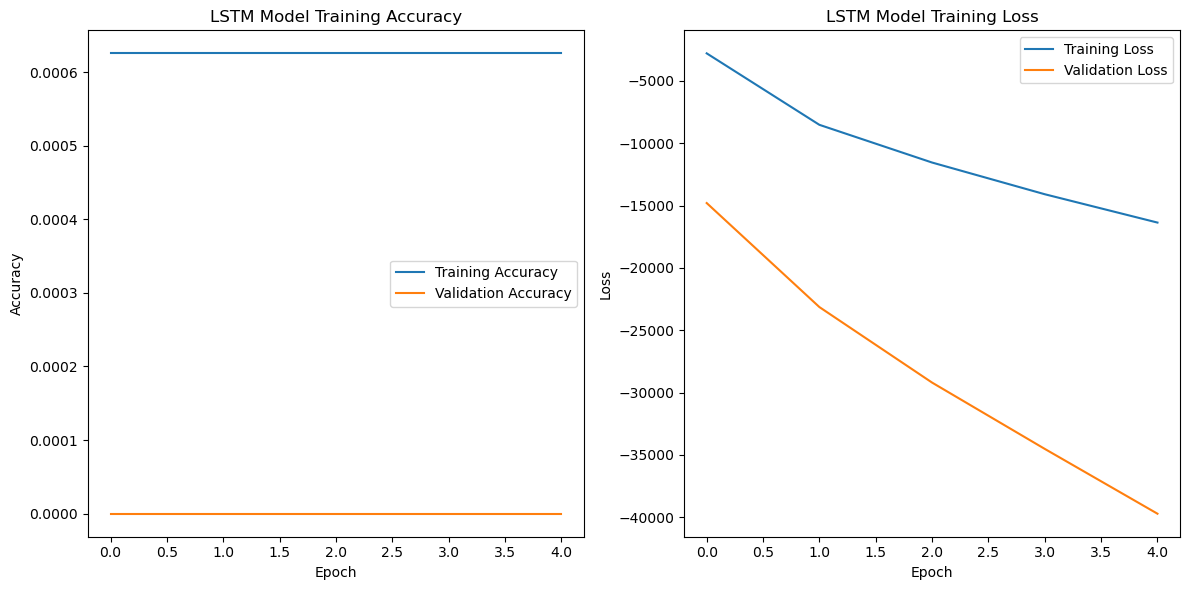

In [28]:
# Install necessary libraries
!pip install wordcloud
!pip install matplotlib

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and display Word Cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Combine all text into a single string
all_text = ' '.join(df['Text'].astype(str))

# Display Word Cloud
generate_wordcloud(all_text)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
df['Sentiment'].hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Visualize LSTM Model Training History
plt.figure(figsize=(12, 6))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
